In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

I decided not to include data of third-party candidates.

In [2]:
# 2020
electoral_votes = [306/(306+232), 232/(306+232)]

In [3]:
#2016
electoral_votes.append(304/(304+227+7))
electoral_votes.append(227/(304+227+7))
# electoral_votes.append(7/(304+227+7))

In [4]:
#2012
electoral_votes.append(332/(332+206))
electoral_votes.append(206/(332+206))

In [5]:
#2008
electoral_votes.append(365/(365+173))
electoral_votes.append(173/(365+173))

In [6]:
#2004
electoral_votes.append(286/(286+251))
electoral_votes.append(251/(286+251))

In [7]:
#2000
electoral_votes.append(271/(271+266+1))
electoral_votes.append(266/(271+266+1))
# electoral_votes.append(1/(271+266+1))

In [8]:
#1996
electoral_votes.append(379/(379+159))
electoral_votes.append(159/(379+159))

In [9]:
#1992
electoral_votes.append(370/(370+168))
electoral_votes.append(168/(370+168))

In [10]:
#1988
electoral_votes.append(426/(426+111+1))
electoral_votes.append(111/(426+111+1))
# electoral_votes.append(1/(426+111+1))

In [11]:
#1984
electoral_votes.append(525/(525+13))
electoral_votes.append(13/(525+13))

In [12]:
#1980
electoral_votes.append(489/(489+49))
electoral_votes.append(49/(489+49))

In [13]:
#1976
electoral_votes.append(297/(297+240+1))
electoral_votes.append(240/(297+240+1))
# electoral_votes.append(1/(297+240+1))

In [14]:
#1972
electoral_votes.append(520/(520+17))
# electoral_votes.append(17/(520+17))

In [15]:
#1968
electoral_votes.append(301/(301+191+46))
electoral_votes.append(191/(301+191+46))
electoral_votes.append(46/(301+191+46))

In [16]:
#1964
electoral_votes.append(486/(486+52))
electoral_votes.append(52/(486+52))

In [17]:
#1960
electoral_votes.append(303/(303+219+15))
electoral_votes.append(219/(303+219+15))
# electoral_votes.append(15/(303+219+15))

In [18]:
#1956
electoral_votes.append(457/(457+73+1))
electoral_votes.append(73/(457+73+1))
# electoral_votes.append(1/(457+73+1))

In [19]:
#1952
electoral_votes.append(442/(442+89))
electoral_votes.append(89/(442+89))

In [20]:
#1948
electoral_votes.append(303/(303+189+39))
electoral_votes.append(189/(303+189+39))
# electoral_votes.append(39/(303+189+39))

In [21]:
#1944
electoral_votes.append(432/(432+99))
electoral_votes.append(99/(432+99))

In [22]:
#1940
electoral_votes.append(449/(449+82))
electoral_votes.append(82/(449+82))

In [23]:
#1936
electoral_votes.append(523/(523+8))
electoral_votes.append(8/(523+8))

In [24]:
#1932
electoral_votes.append(472/(472+59))
electoral_votes.append(59/(472+59))

In [25]:
#1928
electoral_votes.append(444/(444+87))
electoral_votes.append(87/(444+87))

In [26]:
#1924
electoral_votes.append(382/(382+136+13))
electoral_votes.append(136/(382+136+13))
# electoral_votes.append(13/(382+136+13))

In [27]:
#1920
electoral_votes.append(404/(404+127))
electoral_votes.append(127/(404+127))

In [28]:
#1916
electoral_votes.append(277/(277+254))
electoral_votes.append(254/(277+254))

In [29]:
#1912
electoral_votes.append(435/(435+88+8))
electoral_votes.append(88/(435+88+8))

In [30]:
# pd.DataFrame(electoral_votes).to_csv('data/presidential_election_data.csv')

In [31]:
# df = pd.read_csv('data/presidential_election_data.csv', index_col='Unnamed: 0')

In [32]:
# electoral_votes = list(df['0'])

(array([ 7.,  8.,  8., 13.,  5.,  8.,  7.]),
 array([0.01506591, 0.15361851, 0.29217111, 0.4307237 , 0.5692763 ,
        0.70782889, 0.84638149, 0.98493409]),
 <BarContainer object of 7 artists>)

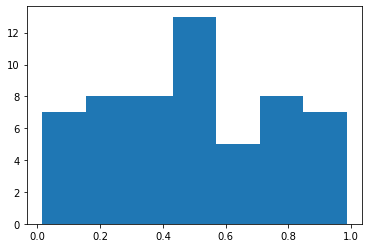

In [33]:
plt.hist(electoral_votes, bins='auto')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6e398cb20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6e399b220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6e398c7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6e399b8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6e399bc40>],
 'means': []}

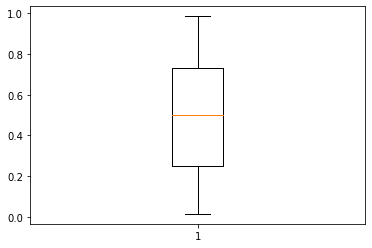

In [34]:
plt.boxplot(electoral_votes)

In [35]:
zscores = np.abs(stats.zscore(electoral_votes))

In [36]:
np.where(zscores >= 3)

(array([], dtype=int64),)

Boxplot and z-score test both confirm no outliers.

In [37]:
np.sqrt(np.var(electoral_votes))

0.2798348001185414

In [38]:
attempt = stats.beta.fit(electoral_votes, loc=0, scale=1)

In [39]:
attempt

(1.0323207519628161,
 0.9750971347366113,
 0.0008912803054408681,
 0.9840428063235611)

In [40]:
alpha, beta = attempt[0:2]

In [41]:
alpha/(alpha+beta)

0.5142530405864548

In [42]:
np.mean(electoral_votes)

0.4965525845246033

In [43]:
def plot_beta(alpha, beta):
    xs = np.arange(0,1,.0001)
    ys = []
    for x in xs:
        ys.append(stats.beta.pdf(x, alpha, beta))
    plt.figure(figsize=(15,8))
    plt.plot(xs, ys, linestyle='-', label='beta distribution')

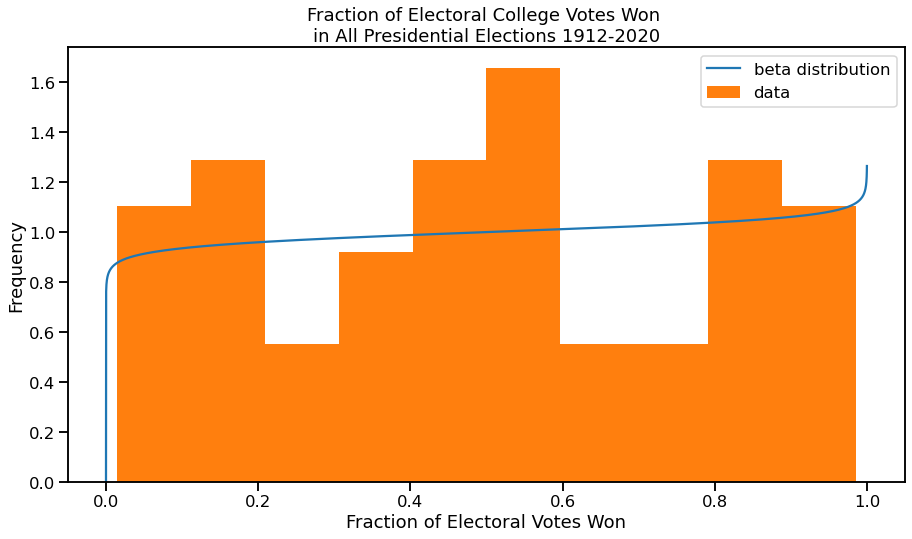

In [44]:
sns.set_context('talk')
plt.rcParams['font.size']=15
plot_beta(alpha, beta)
plt.hist(electoral_votes, density=True, label='data')
plt.xlabel('Fraction of Electoral Votes Won')
plt.ylabel('Frequency')
plt.title('Fraction of Electoral College Votes Won \nin All Presidential Elections 1912-2020')
plt.legend()
# plt.savefig('images/beta_over_hist.png')

In [45]:
biden = [3, 0, 16-3, 0, 63-16, 77-63, 115-77, 0, 0, 0, 126-115, 205-126, 206-205, 210-206, 0, 214-210, 0, 225-214, 227-225, 0, 237-227, 253-237, 273-253, 16+11+6]
trump = [0, 5, 13-5, 24-13, 90-24, 96-90, 120-96, 129-120, 138-129, 144-138, 0, 0, 162-144, 166-162, 204-166, 210-204, 213-210, 0, 0, 214-213, 0, 0, 0, 15+3]
updates = ['VT', 'WV', 'VA', 'IN', 'FL', 'MD', 'CO', 'SC', 'ND, SD', '', '', 'NY', 'CA', 'ME', 'OH', 'ID', '', 'CT', 'MT', 'MN', 'ME', 'ME', 'WI', 'PA', 'GA, NC', '']

In [46]:
sf=1

trump_beta = [(sf*alpha, sf*beta)]
biden_beta = [(sf*alpha, sf*beta)]

for i in range(len(trump)):
    #new alpha and beta for trump
    a, b = trump_beta[i]
    trump_beta.append((a+trump[i], b+biden[i]))
    
    a, b = biden_beta[i]
    biden_beta.append((a+biden[i], b+trump[i]))


In [47]:
xs = range(len(trump)+1)
ys_trump = []
ys_biden = []
for i in range(len(trump_beta)):
    a,b = trump_beta[i]
    ys_trump.append(a/(a+b))
#     ys_trump.append(1 - stats.beta.cdf(.5, a, b))
    a,b = biden_beta[i]
    ys_biden.append(a/(a+b))
#     ys_biden.append(1 - stats.beta.cdf(.5, a, b))

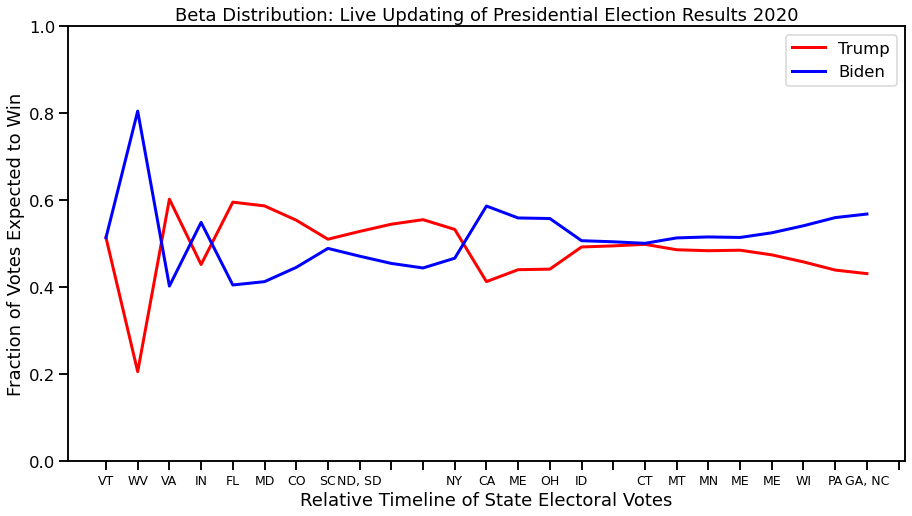

In [48]:
sns.set_context('talk')
plt.rcParams['font.size']=15
plt.figure(figsize=(15,8))
plt.plot(xs, ys_trump, color='red', lw=3, label='Trump')
plt.plot(xs, ys_biden, color='blue', lw=3, label='Biden')
plt.legend()
plt.xlabel('Relative Timeline of State Electoral Votes')
plt.ylabel('Fraction of Votes Expected to Win')
plt.title('Beta Distribution: Live Updating of Presidential Election Results 2020')
plt.xticks(np.arange(26), updates, fontsize='small')
plt.ylim(0,1)
plt.savefig('images/beta_election_updating.png')